CALCULATING SUMMARY STATISTICS

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

IMPORTING DATASET

In [12]:
data=pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


DATA CLEANING 



In [13]:
#Counting the no of missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

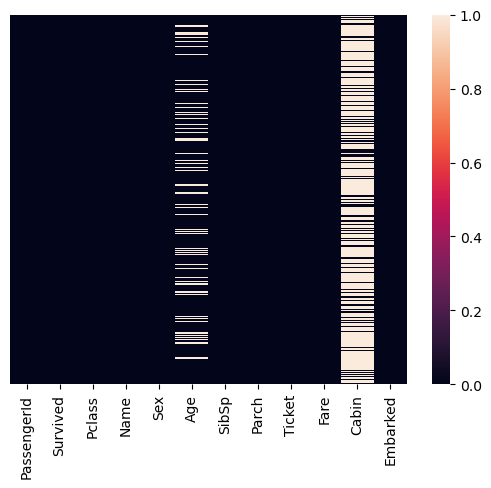

In [14]:
#visualing the misssing data by heatmap
sns.heatmap(data.isnull(), yticklabels=False)

CALCULATING THE PERCENTAGE OF MISSING VALUES 

In [15]:
missing_values=(data.isnull().sum()/len(data))*100
print(missing_values)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


DROPPING THE ROW WHEN WHOLE ROW IS NULL 

In [16]:
data.dropna(how="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


DROPPING NULL VALUES IN THE COLUMN "EMBARKED"

In [17]:
data.dropna(subset=['Embarked'],inplace=True)

COUNTING NO OF THE UNIQUE VALUES CABIN COLUMN

In [18]:
data["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 146, dtype: int64

CALCULATING MODE OF CABIN COLUMN

In [19]:
data["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

REPLACING THE MISSING VALUES WITH MODES VALUES 

In [20]:
data['Cabin'].fillna(data['Cabin'].mode()[2],inplace=True)

REMOVING THE MISSING DATA FROM AGE COLUMN

In [26]:
Q1=data.Age.quantile(0.25)
Q3=data.Age.quantile(0.75)

Q1,Q3


IQR=Q3-Q1
IQR

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-7.0, 65.0)

IDENTIFING THE DATA WITHOUT OUTLIERS

In [27]:
no_outlier=data[(data.Age>=lower_limit)&(data.Age<=upper_limit)]
no_outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,G6,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G6,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


CALCULATING THE MEAN OF AGE COLUMN

REPALCE THE MISSING VALUES


In [29]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [30]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

VISULALIZATION OF HEATMAP WITHOUT MISSING VALUE

<Axes: >

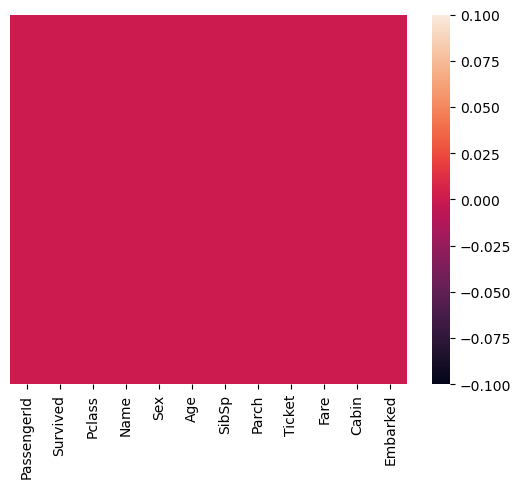

In [31]:
sns.heatmap(data.isnull(),yticklabels=False)

CALCULATING THE SUMMARY STATISTICS OF DATA SCIENCE

STATISTICAL DETAILS OF DATAFRAME

In [33]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


METHOD 2:

In [34]:
data.mean(numeric_only=True)

PassengerId    446.000000
Survived         0.382452
Pclass           2.311586
Age             29.642093
SibSp            0.524184
Parch            0.382452
Fare            32.096681
dtype: float64

In [35]:
data.median(numeric_only=True)

PassengerId    446.000000
Survived         0.000000
Pclass           3.000000
Age             29.642093
SibSp            0.000000
Parch            0.000000
Fare            14.454200
dtype: float64

In [36]:
data.mode()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,29.642093,0.0,0.0,1601,8.05,G6,S
1,2,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,NaN,NaN
2,3,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,NaN,NaN
3,4,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,888,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886,889,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,890,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


data.mode()

In [53]:
data.std(numeric_only=True)

PassengerId    256.998173
Survived         0.486260
Pclass           0.834700
Age             12.968346
SibSp            1.103705
Parch            0.806761
Fare            49.697504
dtype: float64

IMPORTING SECOND FILE

In [54]:
da1=pd.read_csv("gender_submission.csv")
da1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [55]:
da1.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

FILE DOESNT HAVE NULL VALUE

PRINTING THE DATASET

In [56]:
da1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Calculate summary statistics (mean, median,
mode, standard deviation) 

In [57]:
da1.median(numeric_only=True)

PassengerId    1100.5
Survived          0.0
dtype: float64

In [69]:
da1.mode()

,PassengerId,Survived
0,892,0.0
1,893,NaN
2,894,NaN
3,895,NaN
4,896,NaN
...,...,...
413,1305,NaN
414,1306,NaN
415,1307,NaN
416,1308,NaN


In [70]:
da1.std(numeric_only=True)

PassengerId    120.810458
Survived         0.481622
dtype: float64

IMPORTING THE THIRD FILE

In [71]:
da=pd.read_csv("test.csv")
da

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


CALCULATING NULL VALUE

In [72]:
da.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

CLEANING MISSING VALUE

In [73]:
da["Age"].mean()

30.272590361445783

REPLACING THE NULL VALUESS

In [76]:
da['Age'].fillna(data['Age'].mean(),inplace=True)

REPLACING THE NULL VLALUE

In [77]:
da.dropna(subset=['Fare'],inplace=True)

CALCULATING THE NULL VALUES

In [78]:
da.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

CALCULATING CABIN COLUMN

In [79]:
da["Cabin"].mode()

0    B57 B59 B63 B66
Name: Cabin, dtype: object

REPLACING THE MISSING VALUES WITH MODE

In [80]:
da['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)

CHECKING UPDATED NULL VALUE

In [81]:
da.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

CALCULATING THE SUMMARY STATISTICS OF DATA SCIENCE (mean, median,
mode, standard deviation)

In [87]:
da.mean(numeric_only=True)

PassengerId    1100.635492
Pclass            2.263789
Age              30.070072
SibSp             0.448441
Parch             0.393285
Fare             35.627188
dtype: float64

In [88]:
da.median(numeric_only=True)

PassengerId    1101.000000
Pclass            3.000000
Age              29.642093
SibSp             0.000000
Parch             0.000000
Fare             14.454200
dtype: float64

In [89]:
da.mode()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3.0,"Abbott, Master. Eugene Joseph",male,29.642093,0.0,0.0,PC 17608,7.75,G6,S
1,893,NaN,"Abelseth, Miss. Karen Marie",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,894,NaN,"Abelseth, Mr. Olaus Jorgensen",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,895,NaN,"Abrahamsson, Mr. Abraham August Johannes",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,896,NaN,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
412,1305,NaN,"de Brito, Mr. Jose Joaquim",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,1306,NaN,"de Messemaeker, Mr. Guillaume Joseph",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,1307,NaN,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,1308,NaN,"van Billiard, Master. James William",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
da.std(numeric_only=True)

PassengerId    120.923774
Pclass           0.842077
Age             12.564230
SibSp            0.897568
Parch            0.982419
Fare            55.907576
dtype: float64

In [90]:
da.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,2.263789,30.070072,0.448441,0.393285,35.627188
std,120.923774,0.842077,12.564230,0.897568,0.982419,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,1205.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


TASK 2 HAS BEEN COMPLETED